In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [81]:
df=pd.read_csv("Cleaned_processed.csv")
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,TotalCharges,numTechTickets,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.083333,0,0,1,0,0,0,...,0.001275,0,0,0,0,0,0,0,1,0
1,0,0,0,2.833333,0,1,0,0,0,0,...,0.215867,0,0,0,0,1,0,0,0,1
2,0,0,0,0.166667,0,1,1,0,0,0,...,0.010310,0,1,0,0,0,0,0,0,1
3,0,0,0,3.750000,0,1,0,1,1,0,...,0.210241,3,0,0,0,1,0,0,0,0
4,0,0,0,0.166667,0,0,0,0,0,0,...,0.015330,0,1,1,0,0,0,0,1,0


In [82]:
X=df.drop("Churn",axis=1)
y=df["Churn"]

In [83]:
df["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [84]:
cn=df["Churn"].value_counts()
ratio=cn.max()/cn.min()
if ratio>2:
    print(f"Imbalanced Record {ratio}")
else:
    print(f"balanced Record {ratio}")
# it is a imbalnce data set

Imbalanced Record 2.7624398073836276


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,precision_recall_curve,PrecisionRecallDisplay,average_precision_score,roc_curve,auc,RocCurveDisplay,roc_auc_score

In [86]:
# Split into train and test sets
X_train_new, X_test, y_train_new, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#x_train_new is X_train , i changed it for my convinience
# Check class distribution in training and test sets
print("Class distribution in training set:")
print(y_train.value_counts())

print("\nClass distribution in test set:")
print(y_test.value_counts())

Class distribution in training set:
Churn
1    3614
0    3614
Name: count, dtype: int64

Class distribution in test set:
Churn
0    1549
1     561
Name: count, dtype: int64


In [87]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_new, y_train_new)

# Check the new class distribution in the balanced training set
print("\nClass distribution in balanced training set:")
print(y_train.value_counts())



Class distribution in balanced training set:
Churn
1    3614
0    3614
Name: count, dtype: int64


**Logistic Regression**

In [88]:
# modelling
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [89]:
y_pred_train = log_model.predict(X_train)
print( "Accuracy of train Data",accuracy_score(y_train,y_pred_train))
cv = cross_val_score(log_model,X_train,y_train,cv=5,scoring = "accuracy").mean()
print("CV Score",cv)

Accuracy of train Data 0.847399003873824
CV Score 0.8438037397043269


In [90]:
# predicting
y_pred_test = log_model.predict(X_test)
print( "Accuracy of test Data",accuracy_score(y_test,y_pred_test))

Accuracy of test Data 0.8127962085308057


In [91]:
cm_lr=confusion_matrix(y_test,y_pred_test)
cm_lr

array([[1248,  301],
       [  94,  467]], dtype=int64)

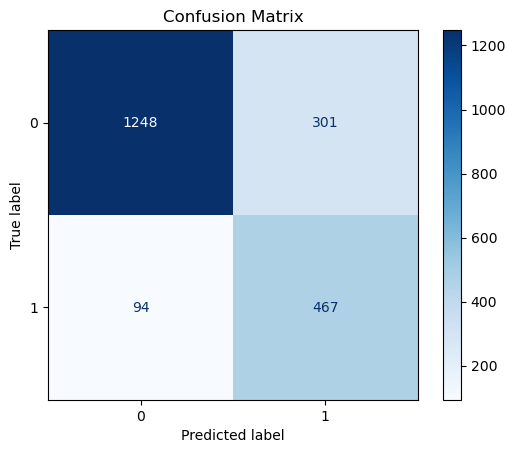

In [92]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [93]:
print(f"Classification Report \n{classification_report(y_test,y_pred_test)}")

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1549
           1       0.61      0.83      0.70       561

    accuracy                           0.81      2110
   macro avg       0.77      0.82      0.78      2110
weighted avg       0.84      0.81      0.82      2110



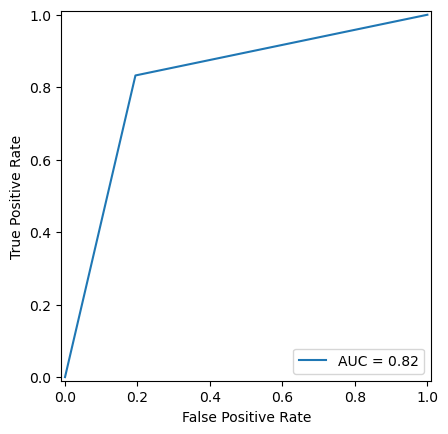

In [94]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay,roc_auc_score
fpr,tpr,thresold=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

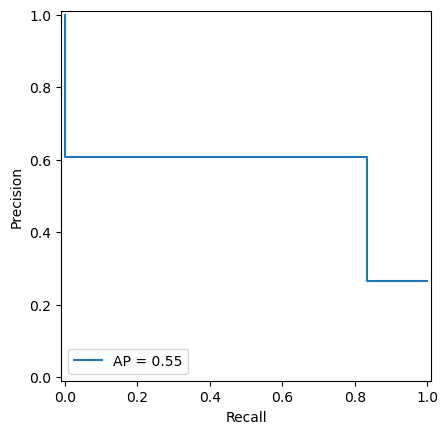

In [95]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, y_pred_test)).plot()

**KNN**

In [96]:
# HPT for knn
estimator= KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,20)),"p":[1,2]}
knn_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn_grid.fit(X_train,y_train)
knn=knn_grid.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [97]:
knn_model=knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [98]:
knn_y_pred_train = knn_model.predict(X_train)
print( "Accuracy of train Data",accuracy_score(y_train,knn_y_pred_train))
cv = cross_val_score(knn_model,X_train,y_train,cv=5,scoring = "accuracy").mean()
print("CV Score",cv)

# predicting
knn_y_pred_test = knn_model.predict(X_test)
print( "Accuracy of test Data",accuracy_score(y_test,knn_y_pred_test))

Accuracy of train Data 0.9986164914222468
CV Score 0.8738260898696799
Accuracy of test Data 0.7805687203791469


In [99]:
cm_knn=confusion_matrix(y_test,knn_y_pred_test)
cm_knn

array([[1254,  295],
       [ 168,  393]], dtype=int64)

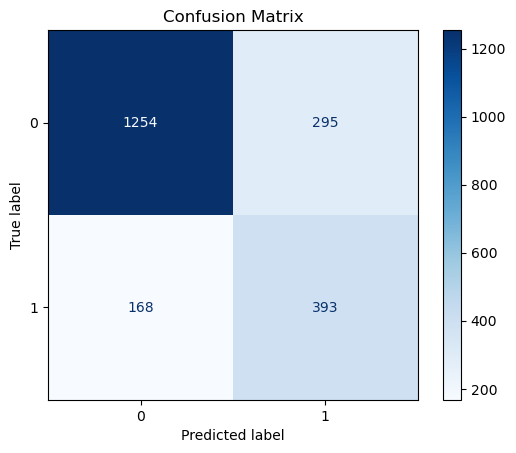

In [100]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [101]:
print(f"Classification Report \n{classification_report(y_test,knn_y_pred_test)}")

Classification Report 
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1549
           1       0.57      0.70      0.63       561

    accuracy                           0.78      2110
   macro avg       0.73      0.76      0.74      2110
weighted avg       0.80      0.78      0.79      2110



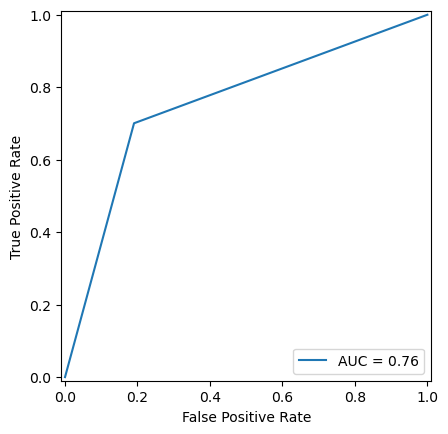

In [102]:
fpr,tpr,thresold=roc_curve(y_test,knn_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

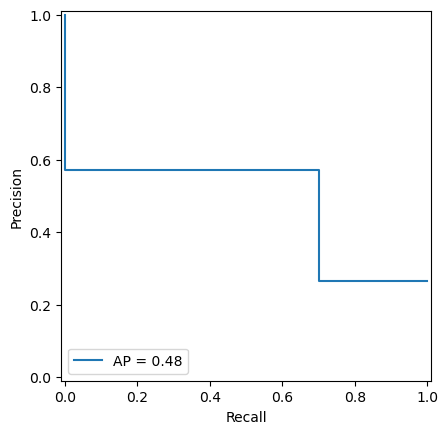

In [103]:
precision, recall, thresholds = precision_recall_curve(y_test, knn_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, knn_y_pred_test)).plot()


**SVM**

In [104]:
# HPT for SVm
estimator= SVC()
param_grid={"C":[0.01,0.1,1.0],"kernel":["linear","poly","sigmoid","rbf"]}
svm_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)
svm_grid.best_estimator_

SVC()

In [105]:
#Modelling
svm_model=svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

SVC()

In [106]:
svm_y_pred_train = svm_model.predict(X_train)
print( "Accuracy of train Data",accuracy_score(y_train,svm_y_pred_train))
cv = cross_val_score(svm_model,X_train,y_train,cv=5,scoring = "accuracy").mean()
print("CV Score",cv)

# predicting
svm_y_pred_test = svm_model.predict(X_test)
print( "Accuracy of test Data",accuracy_score(y_test,svm_y_pred_test))

Accuracy of train Data 0.8645545102379635
CV Score 0.8536267091654821
Accuracy of test Data 0.8227488151658767


In [107]:
cm_svm=confusion_matrix(y_test,svm_y_pred_test)
cm_svm

array([[1260,  289],
       [  85,  476]], dtype=int64)

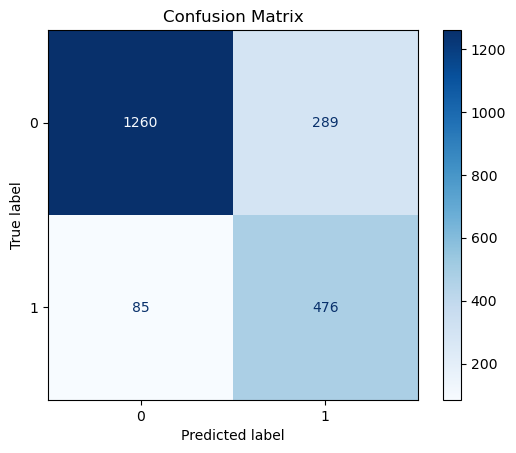

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [109]:
print(classification_report(y_test,svm_y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1549
           1       0.62      0.85      0.72       561

    accuracy                           0.82      2110
   macro avg       0.78      0.83      0.79      2110
weighted avg       0.85      0.82      0.83      2110



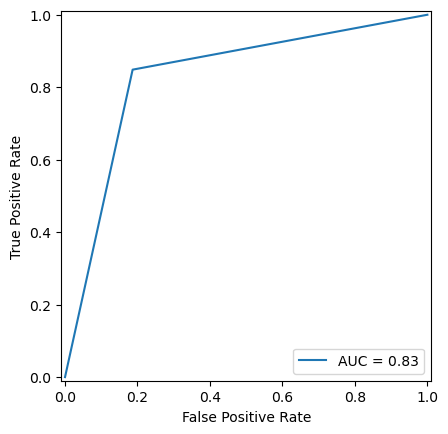

In [110]:
fpr,tpr,thresold=roc_curve(y_test,svm_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

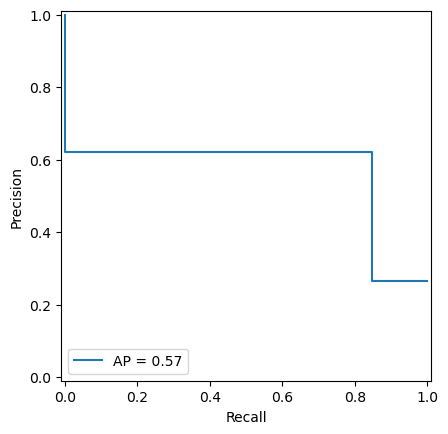

In [111]:
precision, recall, thresholds = precision_recall_curve(y_test, svm_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, svm_y_pred_test)).plot()


**Decision Tree**

In [112]:
# initial decision tree
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

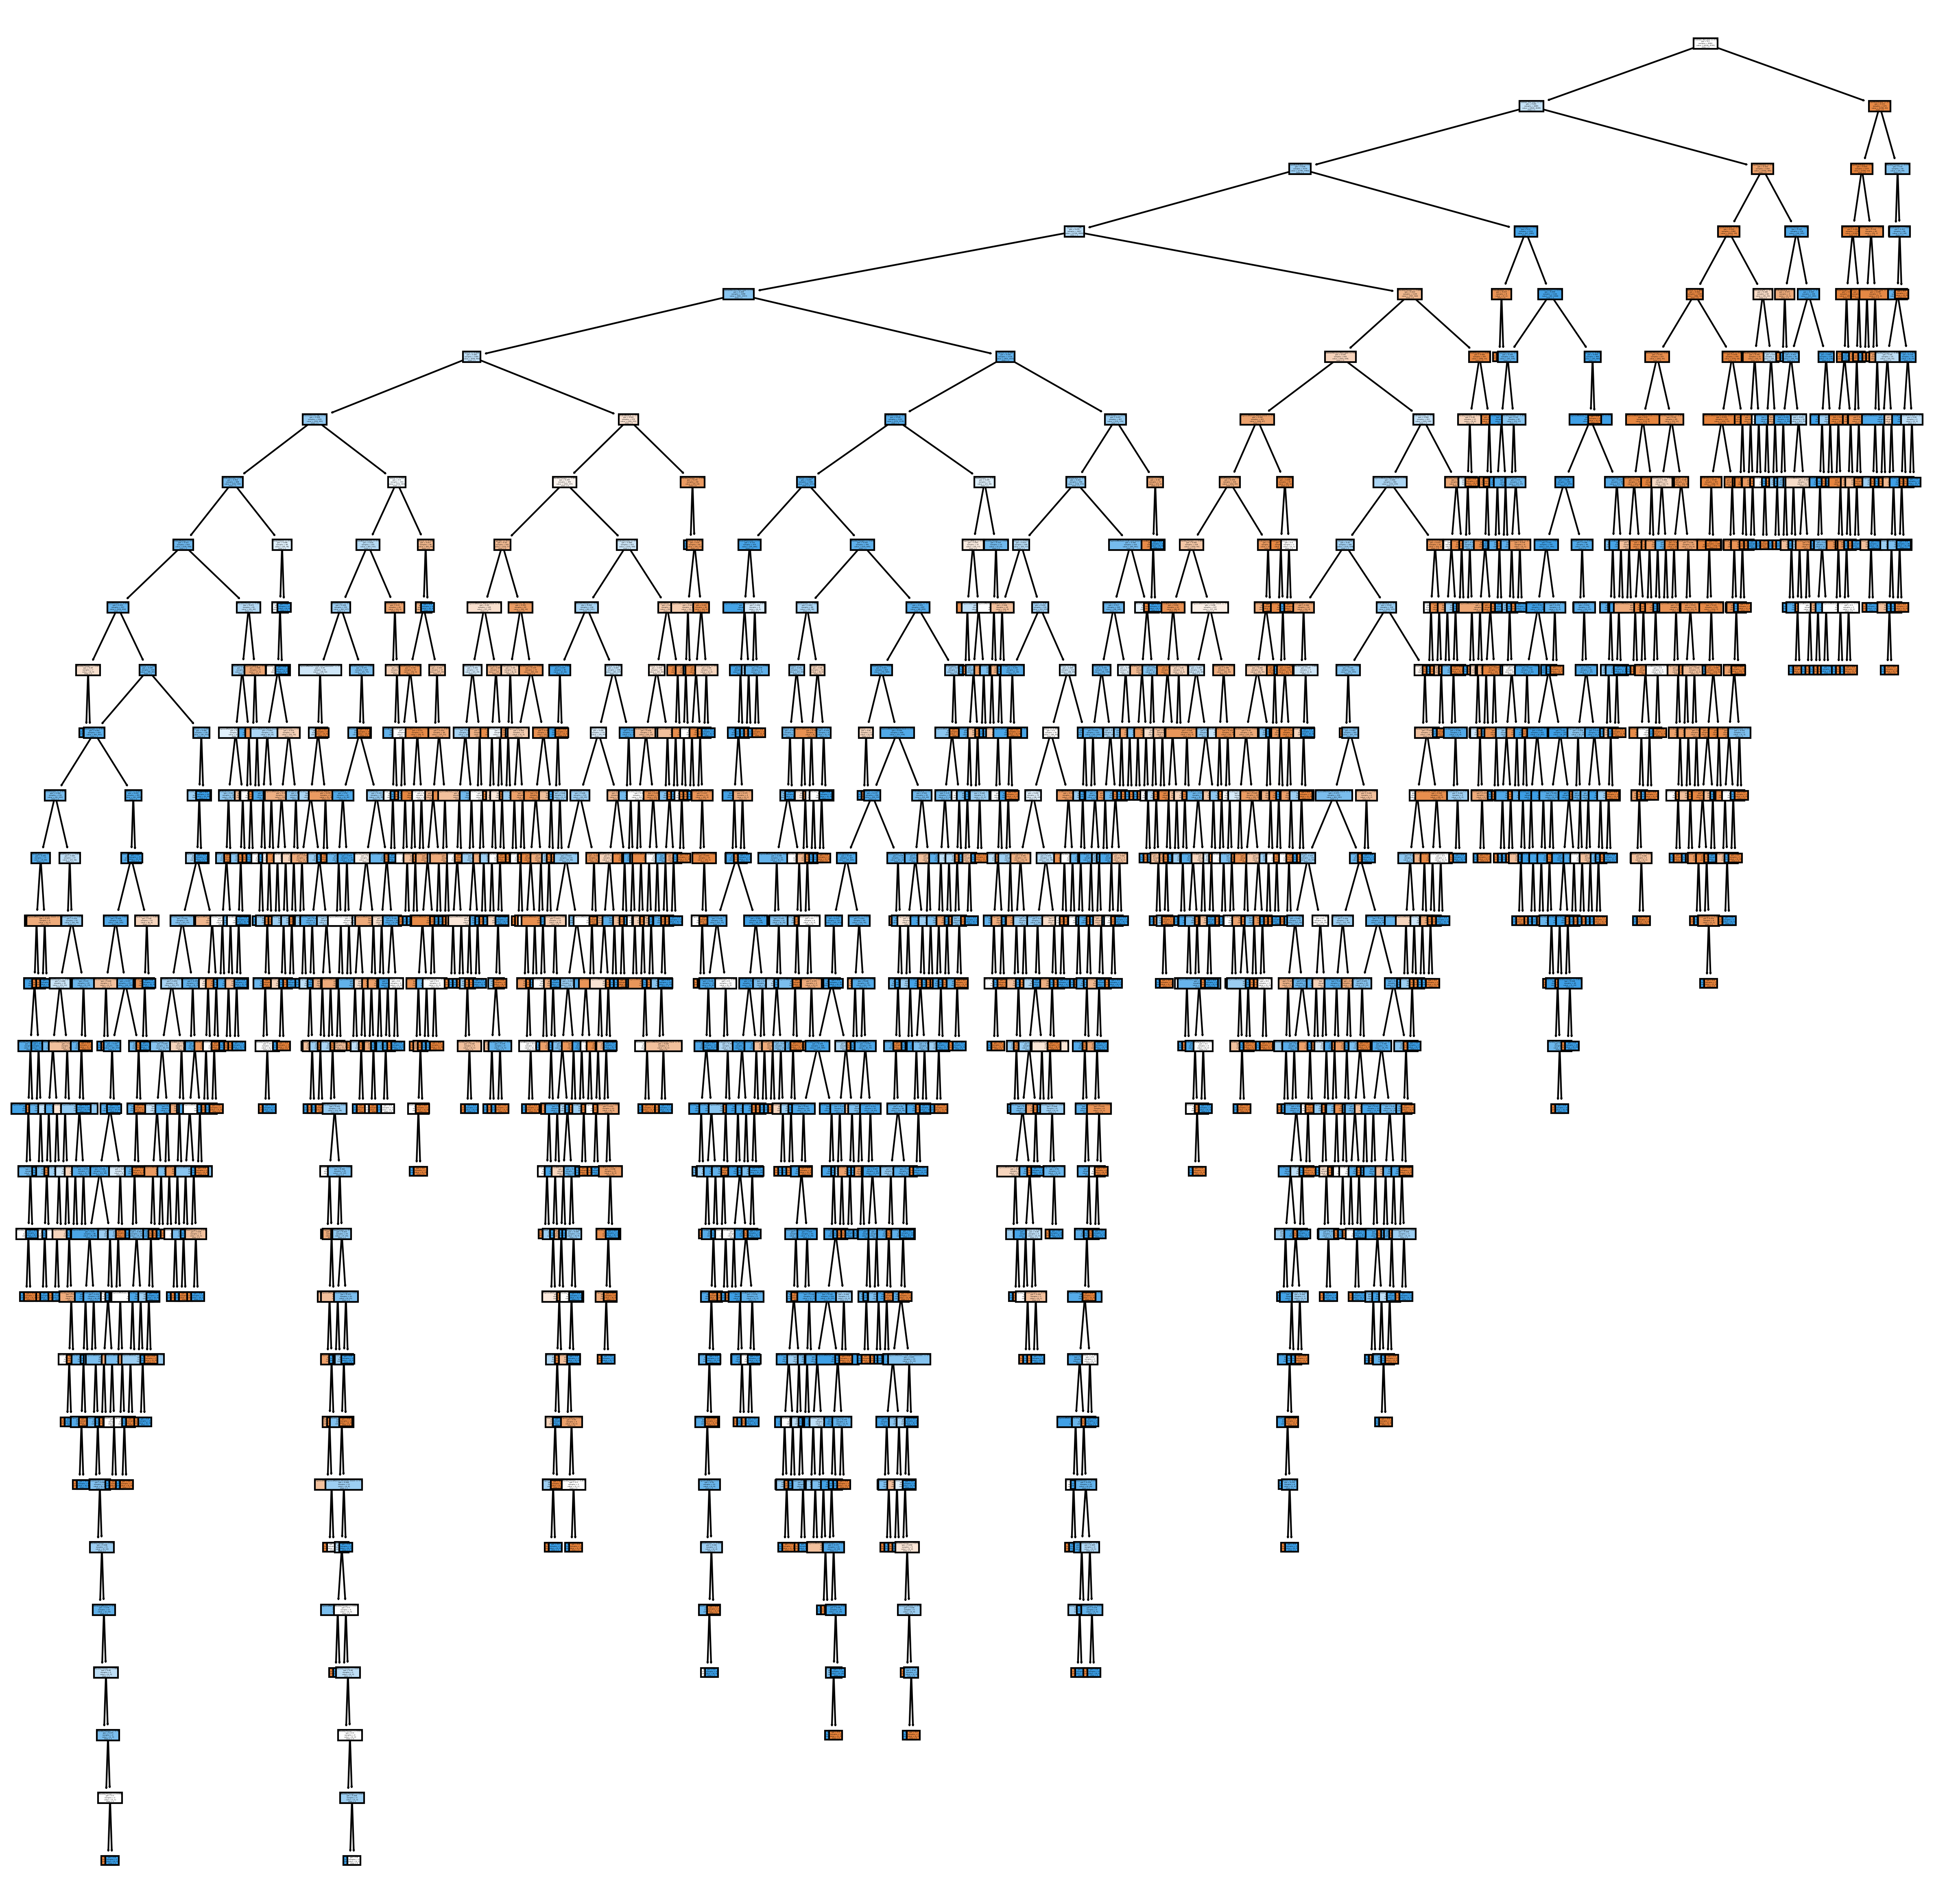

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model_dt,filled=True,feature_names=X_train.columns.tolist(),class_names=['0','1'])
plt.show()

In [113]:
# HPT of dt
estimator= DecisionTreeClassifier()
param_grid={"criterion":["ginni","entropy"],"max_depth":list(range(1,20))}
dt_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X_train,y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=13)

In [114]:
#Important Feature        # feature selection using Decision Tree
feature=pd.DataFrame(data=dt.feature_importances_,index=X_train.columns,columns=["Important"])
important_feature=feature[feature["Important"]>0].index.tolist()
important_feature

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'numTechTickets',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [115]:
# modelling With important feature and best estimator
X_train_dt=X_train[important_feature]

# modelling
dt_model= dt_grid.best_estimator_
dt_model.fit(X_train_dt,y_train)

# prediction & evaluation
y_pred_dt= dt_model.predict(X_train_dt)

print("Train accuracy",accuracy_score(y_train,y_pred_dt))

print( "Coss-Validation Score" , cross_val_score(dt_model,X_train_dt,y_train,cv=5,scoring="accuracy").mean())


Train accuracy 0.9298561151079137
Coss-Validation Score 0.8521048878423715


In [116]:
# predicting
X_test_dt=X_test[important_feature]
dt_y_pred_test = dt_model.predict(X_test_dt)
print( "Accuracy of test Data",accuracy_score(y_test,dt_y_pred_test))

Accuracy of test Data 0.7943127962085308


In [117]:
cm_dt=confusion_matrix(y_test,dt_y_pred_test)
cm_dt

array([[1242,  307],
       [ 127,  434]], dtype=int64)

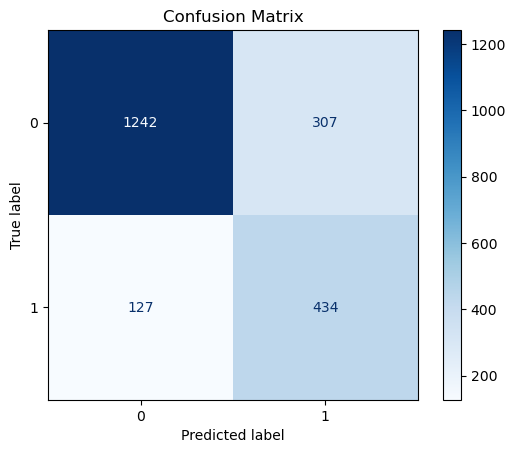

In [118]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [119]:
print(classification_report(y_test,dt_y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1549
           1       0.59      0.77      0.67       561

    accuracy                           0.79      2110
   macro avg       0.75      0.79      0.76      2110
weighted avg       0.82      0.79      0.80      2110



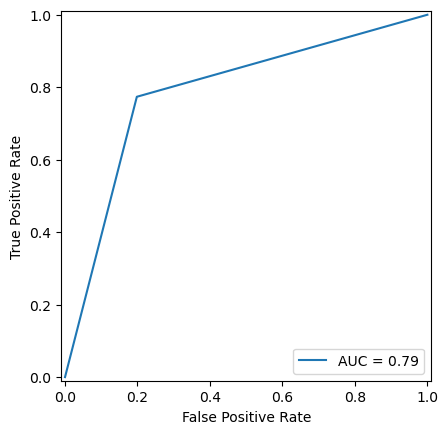

In [120]:
fpr,tpr,thresold=roc_curve(y_test,dt_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

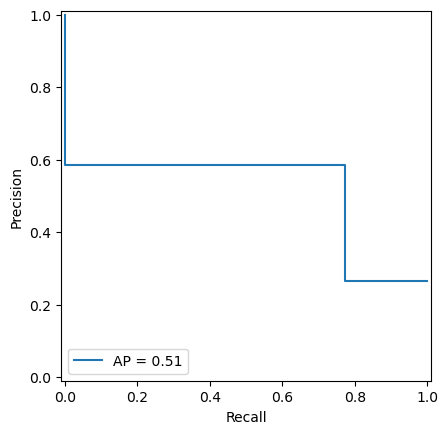

In [121]:
precision, recall, thresholds = precision_recall_curve(y_test, dt_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, dt_y_pred_test)).plot()

**Random Forest**

In [123]:
#HPT
estimator = RandomForestClassifier(random_state=True)
param_grid = {"n_estimators":list(range(20,50))}
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

# Random Forest best Hyperparameter Tuning
rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=44, random_state=True)

In [124]:
#Important Feature        # feature selection using Random Forest
feature_rf=pd.DataFrame(data=rf.feature_importances_,index=X_train.columns,columns=["Important"])
important_feature_rf=feature_rf[feature_rf["Important"]>0].index.tolist()
important_feature_rf

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'numTechTickets',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [125]:
# modelling With important feature and best estimator
X_train_rf=X_train[important_feature_rf]
X_test_rf=X_test[important_feature_rf]

# modelling
rf_model= rf_grid.best_estimator_
rf_model.fit(X_train_rf,y_train)

# prediction & evaluation
y_pred_rf= rf_model.predict(X_train_rf)

print("Train accuracy",accuracy_score(y_train,y_pred_rf))

print( "Coss-Validation Score" , cross_val_score(rf_model,X_train_rf,y_train,cv=5,scoring="accuracy").mean())


Train accuracy 0.9983397897066962
Coss-Validation Score 0.8868322588981895


In [126]:
# predicting
rf_y_pred_test = rf_model.predict(X_test_rf)
print( "Accuracy of test Data",accuracy_score(y_test,rf_y_pred_test))

Accuracy of test Data 0.828436018957346


In [127]:
cm_rf=confusion_matrix(y_test,rf_y_pred_test)
cm_rf

array([[1317,  232],
       [ 130,  431]], dtype=int64)

In [128]:
print(classification_report(y_test,rf_y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1549
           1       0.65      0.77      0.70       561

    accuracy                           0.83      2110
   macro avg       0.78      0.81      0.79      2110
weighted avg       0.84      0.83      0.83      2110



**Ada Boost**

In [129]:
# HPT for AdaBoost
estimator= AdaBoostClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,20))}
ad_b_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ad_b_grid.fit(X_train,y_train)
ad_b=ad_b_grid.best_estimator_
ad_b

AdaBoostClassifier(n_estimators=16, random_state=True)

In [130]:
#Important Feature        # feature selection using Decision Tree
feature_ad=pd.DataFrame(data=ad_b.feature_importances_,index=X_train.columns,columns=["Important"])
important_feature_ad=feature_ad[feature_ad["Important"]>0].index.tolist()
important_feature_ad

['Dependents',
 'tenure',
 'OnlineSecurity',
 'OnlineBackup',
 'MonthlyCharges',
 'TotalCharges',
 'numTechTickets',
 'InternetService_Fiber optic',
 'Contract_One year',
 'Contract_Two year']

In [131]:
# modelling With important feature and best estimator
X_train_ad_b=X_train[important_feature_ad]
X_test_ad_b=X_test[important_feature_ad]

# modelling
ad_model= ad_b_grid.best_estimator_
ad_model.fit(X_train_ad_b,y_train)

# prediction & evaluation
y_pred_ad= ad_model.predict(X_train_ad_b)

print("Train accuracy",accuracy_score(y_train,y_pred_ad))

print( "Coss-Validation Score" , cross_val_score(ad_model,X_train_ad_b,y_train,cv=5,scoring="accuracy").mean())


Train accuracy 0.844770337576093
Coss-Validation Score 0.8464297644857307


In [132]:
# predicting
ad_y_pred_test = ad_model.predict(X_test_ad_b)
print( "Accuracy of test Data",accuracy_score(y_test,ad_y_pred_test))

Accuracy of test Data 0.7962085308056872


In [133]:
cm_ad=confusion_matrix(y_test,ad_y_pred_test)
cm_ad

array([[1201,  348],
       [  82,  479]], dtype=int64)

In [134]:
print(classification_report(y_test,ad_y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1549
           1       0.58      0.85      0.69       561

    accuracy                           0.80      2110
   macro avg       0.76      0.81      0.77      2110
weighted avg       0.84      0.80      0.81      2110



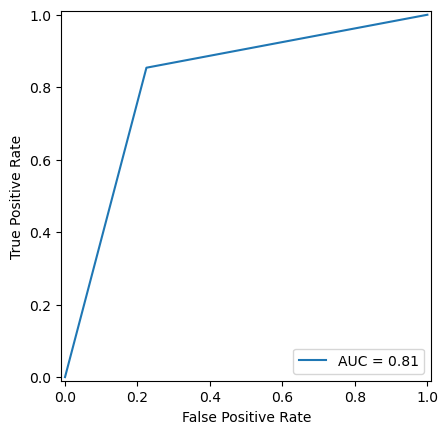

In [135]:
fpr,tpr,thresold=roc_curve(y_test,ad_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

**Gradient Boost**

In [137]:
# HPT for Fradient Boost
estimator= GradientBoostingClassifier(random_state=True)
param_grid={"n_estimators":list(range(20,40)),
           "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.7, n_estimators=38,
                           random_state=True)

In [138]:
#Important Feature        # feature selection using Decision Tree
feature_gb=pd.DataFrame(data=gb.feature_importances_,index=X_train.columns,columns=["Important"])
important_feature_gb=feature_gb[feature_gb["Important"]>0].index.tolist()
important_feature_gb

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'numTechTickets',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [139]:
X_train_gb=X_train[important_feature_gb]
# modelling
gb_model=gb_grid.best_estimator_
gb_model.fit(X_train_gb,y_train)

# prediction & evaluation
y_pred_gb= gb_model.predict(X_train_gb)

print("accuracy score of train data",accuracy_score(y_train,y_pred_gb))

print( "Coss-Validation Score" , cross_val_score(gb_model,X_train_gb,y_train,cv=5,scoring="accuracy").mean())

accuracy score of train data 0.9039845047039292
Coss-Validation Score 0.8684313246899931


In [140]:
# predicting
X_test_gb=X_test[important_feature_gb]
gb_y_pred_test = gb_model.predict(X_test_gb)
print( "Accuracy of test Data",accuracy_score(y_test,gb_y_pred_test))

Accuracy of test Data 0.833175355450237


In [141]:
cm_gb=confusion_matrix(y_test,gb_y_pred_test)
cm_gb

array([[1301,  248],
       [ 104,  457]], dtype=int64)

In [142]:
print(classification_report(y_test,gb_y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1549
           1       0.65      0.81      0.72       561

    accuracy                           0.83      2110
   macro avg       0.79      0.83      0.80      2110
weighted avg       0.85      0.83      0.84      2110



**XG boost**

In [143]:
# HPT for Xgboost
estimator= XGBClassifier()
param_grid={"n_estimators":list(range(1,30)),
           "max_depth":[3, 5, 7, 9],"gamma":[0.1,0.5,0.8,1.0]}
xgb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)
xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=21, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
#Important Feature        # feature selection using Xgboost
feature_xgb=pd.DataFrame(data=xgb.feature_importances_,index=X.columns,columns=["Important"])
important_feature_xgb=feature_xgb[feature_xgb["Important"]>0].index.tolist()
important_feature_xgb

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'numTechTickets',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [145]:
# modelling With important feature and best estimator
X_train_xgb=X_train[important_feature_xgb]
X_test_xgb=X_test[important_feature_xgb]

# modelling
xgb_model= ad_b_grid.best_estimator_
xgb_model.fit(X_train_xgb,y_train)

# prediction & evaluation
y_pred_xgb= ad_model.predict(X_train_xgb)

print("Train accuracy",accuracy_score(y_train,y_pred_xgb))

print( "Coss-Validation Score" , cross_val_score(ad_model,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())


Train accuracy 0.844770337576093
Coss-Validation Score 0.8455998889670585


In [146]:
# predicting
xgb_y_pred_test = xgb_model.predict(X_test_xgb)
print( "Accuracy of test Data",accuracy_score(y_test,xgb_y_pred_test))

Accuracy of test Data 0.7962085308056872


In [147]:
cm_xgb=confusion_matrix(y_test,xgb_y_pred_test)
cm_xgb

array([[1201,  348],
       [  82,  479]], dtype=int64)

In [148]:
print(classification_report(y_test,xgb_y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1549
           1       0.58      0.85      0.69       561

    accuracy                           0.80      2110
   macro avg       0.76      0.81      0.77      2110
weighted avg       0.84      0.80      0.81      2110

